# Домашнее задание «Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок»

https://www.rulit.me/books/statistika-i-kotiki-read-473467-6.html

In [2]:
from IPython.display import Image
import numpy as np
import pandas as pd
import scipy.stats
import scipy.stats as stats
import math
import matplotlib.pyplot as plt

1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.¶

In [3]:
#найти объем выборки
d =225
t = 0.95
sigma = math.sqrt(d)  # Стандартное отклонение
Z = stats.norm.ppf((1+t)/2)    # Квантиль нормального распределения. 
e = 3 #%         #Погрешность

N = ((sigma*Z)/e)**2
print(N)
print(f'объем минимальной выборки для интервальной оценки {math.ceil(N)}')

96.03647051735315
объем минимальной выборки для интервальной оценки 97


2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

In [8]:
import scipy.stats as stats

population_men  =stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women=stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165

stats.ttest_ind(population_men,population_women)

Ttest_indResult(statistic=3.3917739315053637, pvalue=0.0006944195371177623)

Полученный уровень значимости pvalue=0.0007, условиями задачи задан уровень pvalue=0.001, следовательно, отвергаем нулевую гипотезу

3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей.¶

In [13]:
sigma = 150
trust = 0.95
e = 50
Z = stats.norm.ppf((1+trust)/2)    # Квантиль нормального распределения. 

N = ((sigma*Z)/e)**2
print(N)
print(f'объем необходимой выборки {math.ceil(N)}')

34.573129386247125
объем необходимой выборки 35


4. Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, если уровнь значимости принять за 0.05 ?¶

In [16]:
observations = pd.DataFrame([[14,36],[15,45]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,14,36
Солнце,15,45


In [19]:
import scipy as sp
oddsratio, pvalue = sp.stats.fisher_exact(observations) 
# Возможно вам пригодится эта функция.
print(oddsratio, pvalue)


1.1666666666666667 0.828664440194697


Н0 у нас говорит о том, что маг не умеет предсказыть погоду так как pvalue = 0.82, а уровнь значимости принят 0.05.

5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки:¶
data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]

In [ ]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [20]:
def mean_confidence_interval(data, confidence=0.9):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)
    return m-h,m, m+h

data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]


print(mean_confidence_interval(data, 0.9))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.¶

In [22]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]


In [23]:
stats.ttest_ind(data_1, data_2)

Ttest_indResult(statistic=7.35744682757447, pvalue=2.1159475572725764e-11)

Отвергаем H0, pvalue=2.1159475572725764e-11, выборки data_1 и data_2 
не относятся к одному множеству

7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.
Предположим, Вы сформировали две гипотезы: 
Нулевая гипотеза - распределение нормальное, 
Альтернативная гипотеза - распределение не нормальное.
Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)¶

Ответ: когда p-value = 0.05, то аргументов достаточно, чтобы отвергнуть H0. 
В нашем примере p-value = 0.03 то мы отвергаем H0.

8. Первая выборка — это пациенты, которых лечили препаратом А. Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)
а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики? (уровень значимости принять за 5% или 0.05)¶
b) При каком минимальном P-values различия были бы уже значимы?

In [25]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)

stats.ttest_ind(A, B)
# Подсказка, обратити внимание на Two-sample T-test

Ttest_indResult(statistic=0.33196234898293125, pvalue=0.740034005650458)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000010A60650F70>]],
      dtype=object)

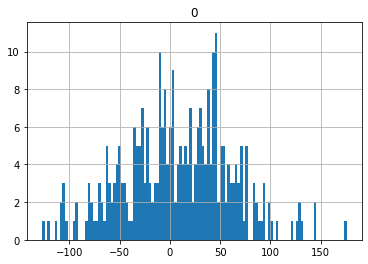

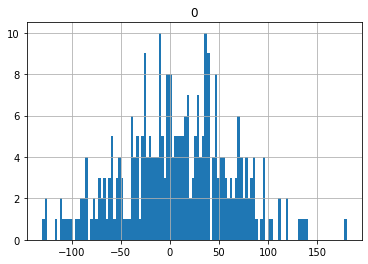

In [27]:
pd.DataFrame(A).hist(bins=120)
pd.DataFrame(B).hist(bins=120)

In [28]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000010A5FEC3550>]],
      dtype=object)

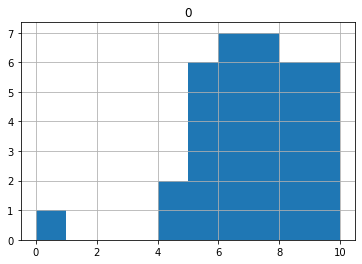

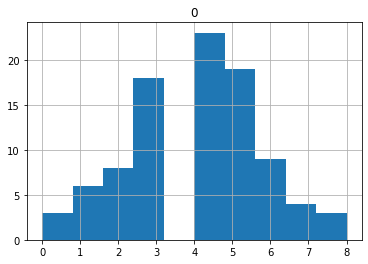

In [29]:
pd.DataFrame(data_1).hist(bins=10)
pd.DataFrame(data_2).hist(bins=10)

ответ: а) Значение pvalue=0,74 говорит о том, что существует вероятность 74% и это больше, чем уровень значимости 5%,значит принимаем Н0. 
б) При сравнении с p_value = 0.05 различия были бы уже значимы.